# STATISTICS DATA ANALYSIS PROJECT 

## IMPORTING LIBRARIES

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## LOADING THE DATA

In [294]:
df=pd.read_csv("taxis_cleaned.csv")

In [109]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,3/23/2019 20:21,3/23/2019 20:27,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,3/4/2019 16:11,3/4/2019 16:19,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,3/27/2019 17:53,3/27/2019 18:00,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3/10/2019 1:23,3/10/2019 1:49,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,3/30/2019 13:27,3/30/2019 13:37,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [110]:
df.shape

(6404, 14)

## EXPLORATORY DATA ANALYSIS

In [295]:
df.dtypes

pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

In [296]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])

In [297]:
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [298]:
df['duration']=df['dropoff']-df['pickup']
df['duration']=df['duration'].dt.total_seconds()/60

In [299]:
df=df[['passengers','payment','fare','tip','duration']]
df

,passengers,payment,fare,tip,duration
0,1,credit card,7.0,2.15,6.0
1,1,cash,5.0,0.00,8.0
2,1,credit card,7.5,2.36,7.0
3,1,credit card,27.0,6.15,26.0
4,3,credit card,9.0,1.10,10.0
...,...,...,...,...,...
6399,1,credit card,4.5,1.06,4.0
6400,1,credit card,58.0,0.00,56.0
6401,1,cash,16.0,0.00,19.0
6402,1,credit card,6.0,0.00,5.0


In [300]:
df.isnull().sum()

passengers    0
payment       0
fare          0
tip           0
duration      0
dtype: int64

In [301]:
df[df.duplicated()]


,passengers,payment,fare,tip,duration
85,1,cash,5.0,0.00,4.0
95,1,cash,13.5,0.00,17.0
101,1,cash,6.5,0.00,6.0
118,1,cash,7.0,0.00,8.0
119,1,cash,2.5,0.00,0.0
...,...,...,...,...,...
6393,1,cash,16.0,0.00,19.0
6395,1,cash,8.0,0.00,7.0
6399,1,credit card,4.5,1.06,4.0
6401,1,cash,16.0,0.00,19.0


In [302]:
df.drop_duplicates(inplace=True)

In [303]:
df.shape

(4321, 5)

In [304]:
df['passengers'].value_counts(normalize = True)

passengers
1    0.650312
2    0.161768
5    0.056931
3    0.049988
6    0.034714
4    0.024763
0    0.021523
Name: proportion, dtype: float64

In [305]:
df['payment'].value_counts(normalize = True)

payment
credit card    0.721129
cash           0.278871
Name: proportion, dtype: float64

In [306]:
df=df[df['passengers']>0]

In [307]:
df.describe()

,passengers,fare,tip,duration
count,4228.000000,4228.000000,4228.000000,4228.000000
mean,1.753548,15.627571,2.490539,17.166509
std,1.359386,12.854828,2.647034,12.838967
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,7.500000,0.000000,8.000000
50%,1.000000,11.500000,2.000000,14.000000
75%,2.000000,18.500000,3.300000,23.000000
max,6.000000,150.000000,23.190000,108.000000


In [308]:
df=df[df['fare']>0]
df=df[df['tip']>0]
df=df[df['duration']>0]

In [309]:
df.describe()

,passengers,fare,tip,duration
count,3136.000000,3136.000000,3136.000000,3136.000000
mean,1.730230,14.043865,3.348811,15.457908
std,1.340544,11.034299,2.547568,11.314138
min,1.000000,2.500000,0.010000,1.000000
25%,1.000000,7.000000,1.890000,8.000000
50%,1.000000,10.500000,2.660000,13.000000
75%,2.000000,16.500000,3.950000,20.000000
max,6.000000,100.000000,23.190000,81.000000


### Check Outliers

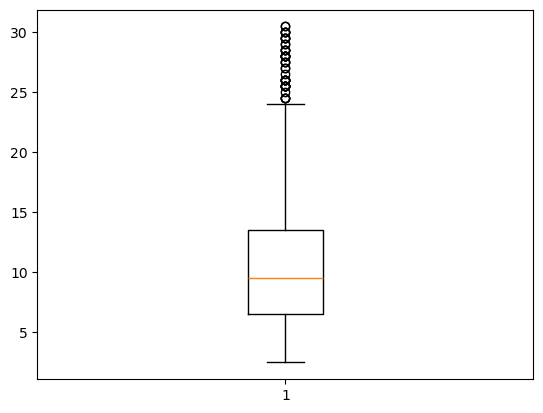

In [324]:
plt.boxplot(df['fare'])
plt.show()

### Remove Outliers

In [311]:
for col in ['fare','tip','duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3-q1

    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [259]:
df

,passengers,payment,fare,tip,duration
0,1,cash,7.0,2.15,6
1,1,cash,7.5,2.36,7
3,3,cash,9.0,1.10,10
4,1,cash,7.5,2.16,10
5,1,cash,13.0,2.00,10
...,...,...,...,...,...
2584,1,cash,11.5,2.00,11
2585,1,credit card,9.5,2.16,11
2586,2,credit card,11.0,2.91,14
2587,1,credit card,4.5,0.50,3


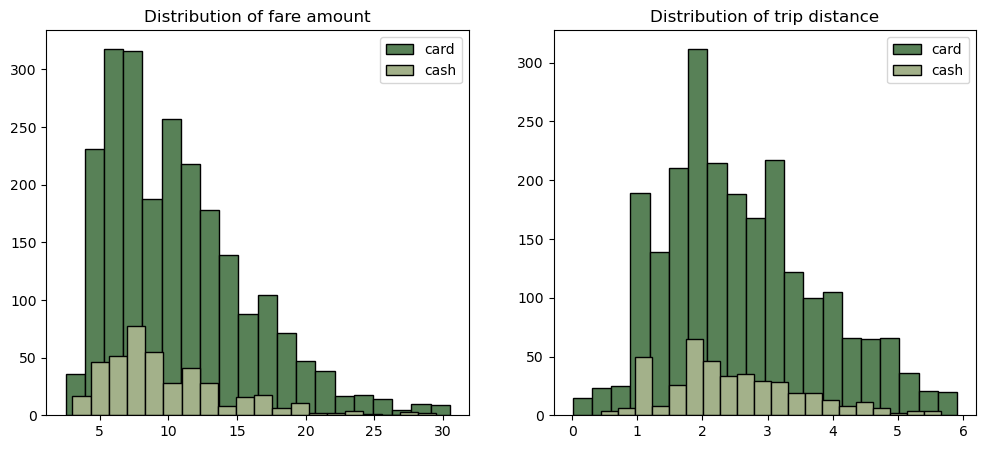

In [312]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of fare amount")
plt.hist(df[df['payment']=='credit card']['fare'],histtype='barstacked',bins=20,edgecolor='k',color='#588157',label='card')
plt.hist(df[df['payment']=='cash']['fare'],histtype='barstacked',bins=20,edgecolor='k',color='#a3b18a',label='cash')
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of trip distance")
plt.hist(df[df['payment']=='credit card']['tip'],histtype='barstacked',bins=20,edgecolor='k',color='#588157',label='card')
plt.hist(df[df['payment']=='cash']['tip'],histtype='barstacked',bins=20,edgecolor='k',color='#a3b18a',label='cash')
plt.legend()
plt.show()

In [313]:
df.groupby('payment').agg({'fare':['mean','std'],'tip':['mean','std']})

fare                 tip          
                  mean       std      mean       std
payment                                             
cash          9.942308  4.762457  2.484495  1.064102
credit card  10.676368  5.128674  2.599500  1.178266

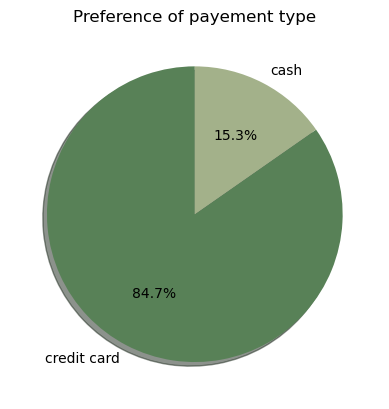

In [314]:
plt.title('Preference of payement type')
plt.pie(df['payment'].value_counts(normalize=True),labels=df['payment'].value_counts().index,
        startangle=90,shadow=True,autopct='%1.1f%%',colors=['#588157','#a3b18a'])
plt.show()

In [315]:
passengers=df.groupby(['payment','passengers'])[['passengers']].count()
passengers.rename(columns={'passengers':'count'},inplace=True)
passengers.reset_index(inplace = True)

In [316]:
passengers['perc']= (passengers['count']/passengers['count'].sum())*100

In [317]:
passengers

,payment,passengers,count,perc
0,cash,1,286,10.522443
1,cash,2,73,2.685798
2,cash,3,16,0.588668
3,cash,4,8,0.294334
4,cash,5,19,0.699043
5,cash,6,14,0.515085
6,credit card,1,1518,55.849890
7,credit card,2,379,13.944077
8,credit card,3,117,4.304636
9,credit card,4,60,2.207506


In [318]:
dfs=pd.DataFrame(columns=['payment',1,2,3,4,5,6])
dfs['payment']=['cash','card']
dfs.iloc[0,1:]=passengers.iloc[0:6,-1]
dfs.iloc[1,1:]=passengers.iloc[6:,-1]
dfs

,payment,1,2,3,4,5,6
0,cash,10.522443,2.685798,0.588668,0.294334,0.699043,0.515085
1,card,55.84989,13.944077,4.304636,2.207506,5.298013,3.090508


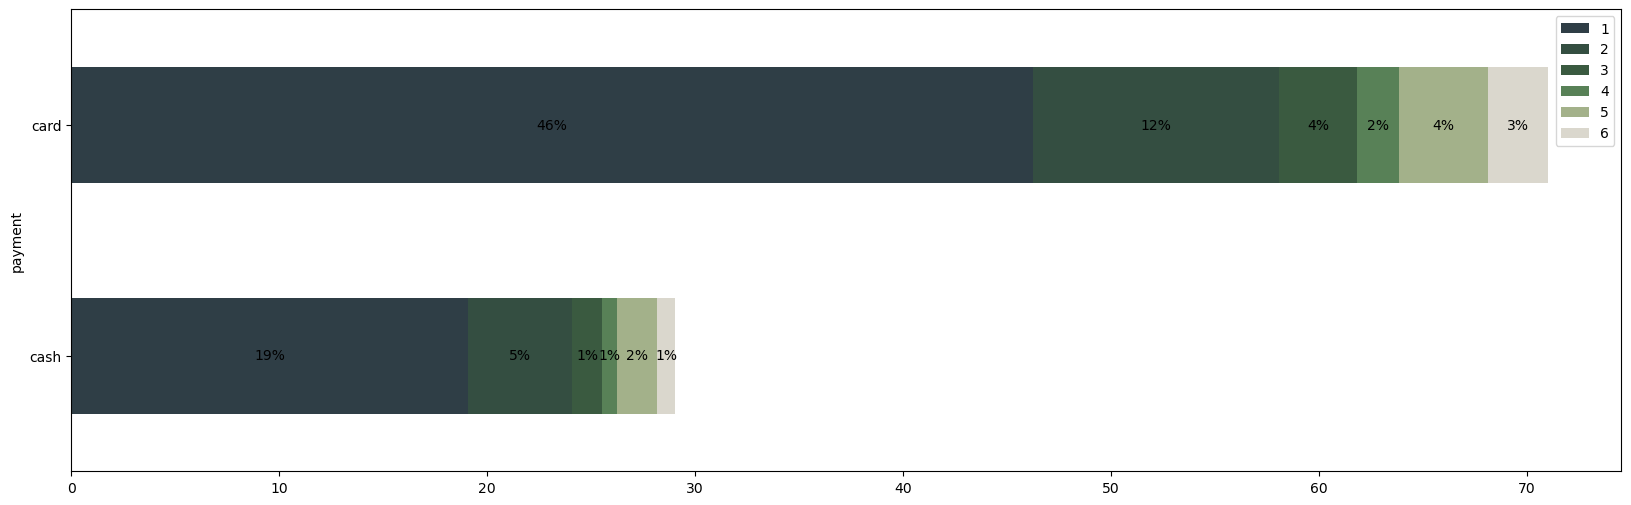

In [280]:
fig,ax=plt.subplots(figsize=(20,6))
dfs.plot(x='payment',kind='barh',stacked=True,ax=ax,color=['#2f3e46','#344e41','#3a5a40','#588157','#a3b18a','#dad7cd'])
for p in ax.patches:
    width=p.get_width()
    hight=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,
            y+hight/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

##### Null Hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash
##### Alternative Hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash

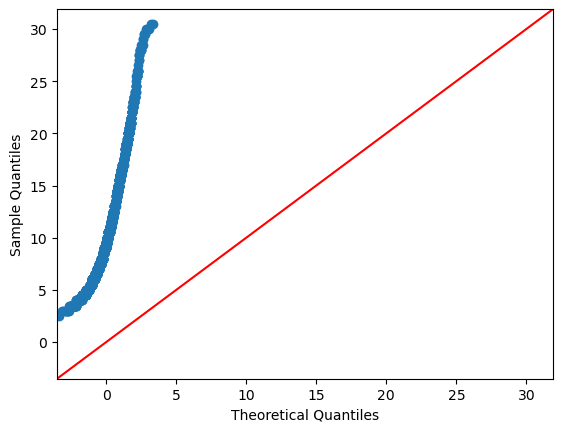

In [319]:
sm.qqplot(df['fare'], line='45')
plt.show()

In [321]:
card_sample=df[df['payment']=='credit card']['fare']
cash_sample=df[df['payment']=='cash']['fare']

In [322]:
t_stat,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print("T Statistics",t_stat,"P value",p_value)

T Statistics 2.858455377899871 P value 0.004404299299629956


#### Based on our analysis, we have strong evidence to reject the null hypothesis. This means there is a statistically significant difference in the average fare between credit card users and cash users.

# ________________________________________________________________